<a href="https://colab.research.google.com/github/Etnawu/Exploratory-Data-Analysis-List-of-World-Cities-by-Population-Density/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of Airbnb data in Toronto


Examination of dataset with detailed listings data.

Data downloaded from: [insideairbnb.com](http://insideairbnb.com/get-the-data/)

Data Dictionary: [Provided by Data provider](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)

License: [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

Expected Update Frequency: Never

# Import

*   import pandas
*   import matplotlib
*   import dataset from Github repo



Data set has previously been trimmed on Excel prior to upload.
Unrelated columns has been removed.
Listings with no reviews have also been removed.





In [181]:
!pip install pandas

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
url = 'https://raw.githubusercontent.com/Etnawu/airbnb2023/main/listings.csv'
df = pd.read_csv('https://raw.githubusercontent.com/Etnawu/airbnb2023/main/listings.csv')

In [184]:
row_count = len(df)
print("Number of rows:", row_count)

Number of rows: 15197


# Questions to answer

Market analysis

*   What is the most common types of listings available in different neighborhoods ?

*   What is the availability of listings across different neighborhoods


Host analysis

* Which hosts have the highest number of listings ?

* Is there any correlation between host response time and reviews ?

Guest Analysis

* What are the most common amenities offered by hosts ?

* Is there any correlation between review scores and other factors such as price, host response time, or listing type?

# Analysis and Visualization

# Types of rentals in each neighborhood

## Private Rooms

In [185]:
# Group the dataframe by neighborhood and find the most common room type in each neighborhood, than get unique neighborhoods
most_common_property = df.groupby('neighbourhood_cleansed')['room_type'].agg(lambda x: x.mode()[0])
neighborhoods = most_common_property.index

#Count types of rental type by neighborhood
neighborhood_rtype_counts = df.groupby(['neighbourhood_cleansed', 'room_type']).size()

#Get private room available in each unique neighborhood
private_room_counts = neighborhood_rtype_counts.loc[neighborhoods, 'Private room']

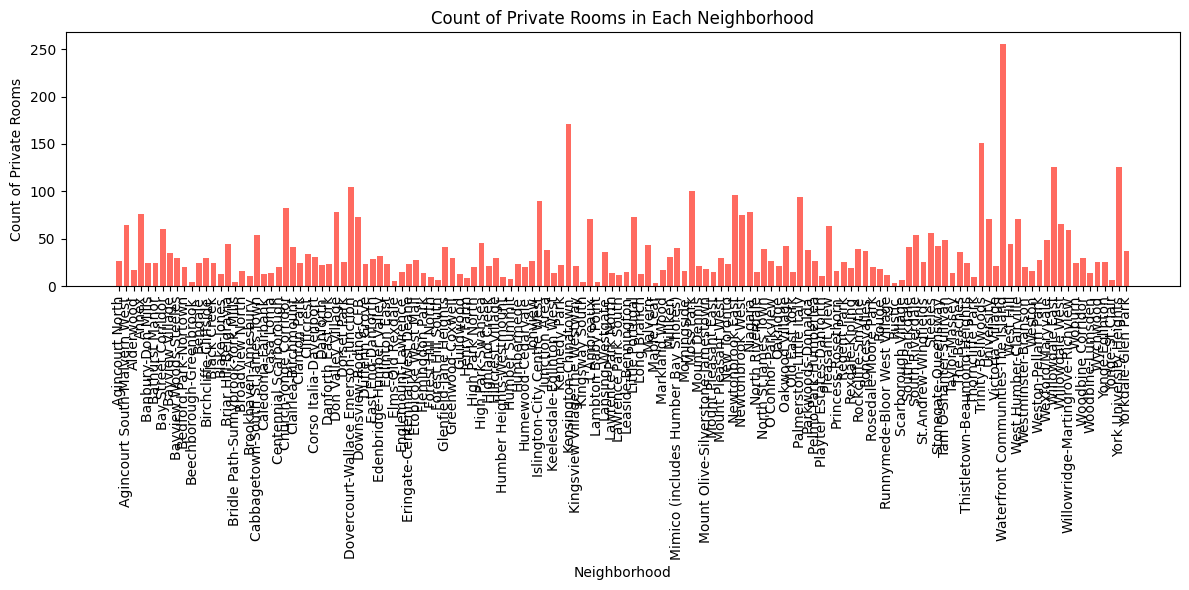

In [186]:
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(neighborhoods, private_room_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Private Rooms')
plt.title('Count of Private Rooms in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [194]:
# Sort the private room counts in descending order than get top 20
private_top_20_neighborhoods = private_room_counts.sort_values(ascending=False).head(20)

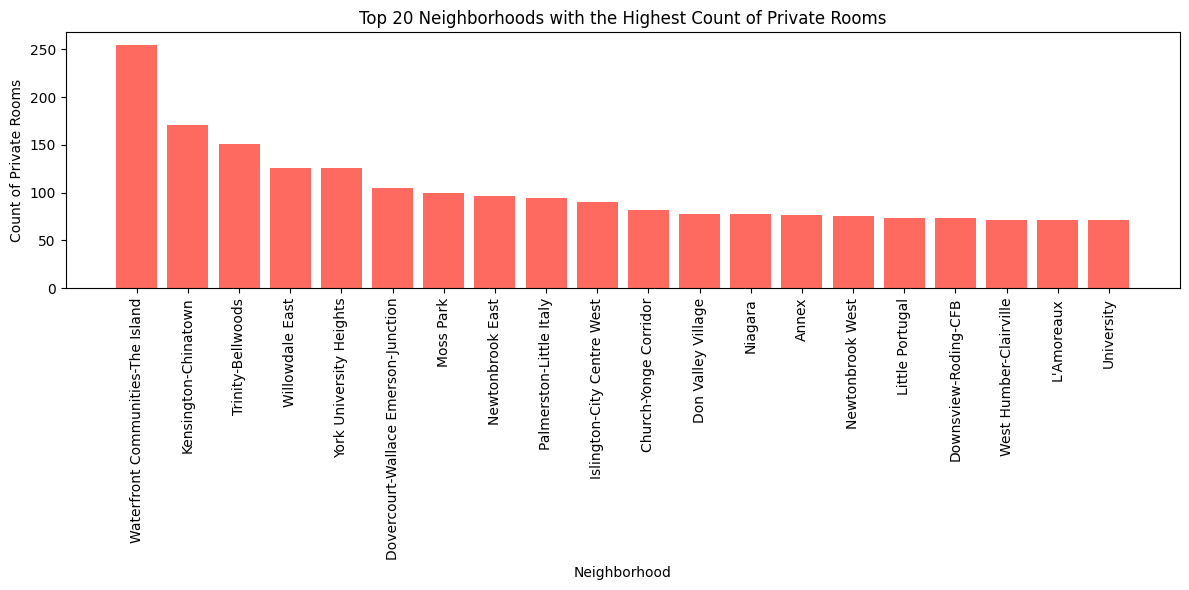

In [195]:
# Extract the neighborhood names and counts
priv_neighborhood_names = private_top_20_neighborhoods.index.get_level_values('neighbourhood_cleansed')
priv_counts = private_top_20_neighborhoods.values

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(priv_neighborhood_names, priv_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Private Rooms')
plt.title('Top 20 Neighborhoods with the Highest Count of Private Rooms')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()


In [203]:
#Average count of private airbnb listings per neighborhood
priv_mean = sum(priv_counts) / len(priv_counts)
print(priv_mean)

103.1


In [199]:
print(private_room_counts.sort_values(ascending=False).head(5))

neighbourhood_cleansed             room_type   
Waterfront Communities-The Island  Private room    255
Kensington-Chinatown               Private room    171
Trinity-Bellwoods                  Private room    151
Willowdale East                    Private room    126
York University Heights            Private room    126
dtype: int64


In the context of private room listings, the average availability per neighborhood is **103.1**. Certain neighborhoods exhibit notably higher levels of availability, indicating a more competitive market for hosts considering renting private rooms in these areas via Airbnb.

**Waterfront Communities-The Island**: **255** private room listings. It's 147% above average availability indicates high competition but with potential high guest turnovers

**Kensington-Chinatown** : **171** private room listings. 66% above average.

**Trinity-Bellwoods**: **151** private
 room listings. 46% above average.

**Willowdale East and York University Heights** :**126** private room listings. 22% above average.

